# Week 5 In-Class Activities:

## Trend Analysis + Hypothesis Testing with Global Climate Model Output

We are going to revisit the output from a global climate model, the Community Earth System Model (CESM). The data are **globally and annually averaged surface temperature** for a pre-industrial integration (GHGs, etc. fixed at year 1850 values) and a set of 30 individual integrations from 1920-2100.

This activity is adapted from Prof. Jennifer Kay's Objective Data Analysis course at CU Boulder (Originally coded by Prof. Jennifer Kay (CU Boulder) with input from Elizabeth Maroon (CU ATOC/CIRES Postdoc 2018))

First, we import the packages that we will need. Make sure that you have installed the netCDF4 package.

In [22]:
#import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=12) # set default font size and weight for plots
from netCDF4 import Dataset # we need this package to read in the GCM data
import scipy.stats as st

Next, we read in the GCM data. The GCM data is stored in a file type called "netCDF". This is a very common climate data file type. To learn more about this file type, check out the following [link](https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/netcdf-overview#:~:text=NetCDF%20). 

This time we are only going to use the 20th-21st century data [here](https://github.com/kls2177/ccia_files/blob/master/TS_timeseries_cesmle_1920_2100.nc?raw=true).

In [57]:
# Read in the data from netcdf files
# These data are global annual mean surface temperatures from the CESM Large Ensemble (LENS) Project.

# Read in 20th and 21st century integrations. There are 30 individual integrations of 181 years each.
fname1="/Users/Karen/Dropbox/EES1132/Fall2020/Activities/Week2/TS_timeseries_cesmle_1920_2100.nc" # filename
nc1 = Dataset(fname1) # read in file
TS_lens = nc1.variables["gts_ann_allcesmle"][:] # Extract variable we want. Note: TS_lens is a numpy array
year = nc1.variables["year"][:] # Extract another variable

Let's remind ourselves of how this data is structured. Print out the shape of TS_lens. You should see an array with dimensions that correspond to 30 integrations of 181 years each.

In [58]:
# check that you have the right dimensions to your data
TS_lens.shape

(30, 181)

## I. Trend Analysis

If you recall from the first in-class activity that we did, we can clearly see a large secular trend in the temperature data over the 20th century and into the 21st century. Let's quantify these trends.

Here, we are going to do the following:

- calculate the trend for each ensemble member for two distinct 50-year time periods: 1951-2000 and 2051-2100.
- calculate the confidence interval on the slope for just the 1st ensemble member for each 50-year time period.
- perform a t-test to test the significant difference between samples of trends

### Calculate trends

## **STEP 1:**

The first step we need to do is slice the data. Let's extract the two 50-year time periods for all 30 ensemble members. Let's also slice the variable `year` so that we can use it to compute the trend.

In [39]:
# Extract the 1951-2000 time period for all ensemble members.
TS_19512000 = TS_lens[:,31:81]
year1 = year[31:81]

# Extract the 2051-2100 time period for all ensemble members.
TS_20512100 = TS_lens[:,131:181]
year2 = year[131:181]

Print out the shape of TS_19512000 to make sure that you get 50 years for 30 ensemble members.

In [60]:
print(TS_20512100.shape)

(30, 50)


Let's plot these ensemble mean of each of these time series to get a sense of what they look like.

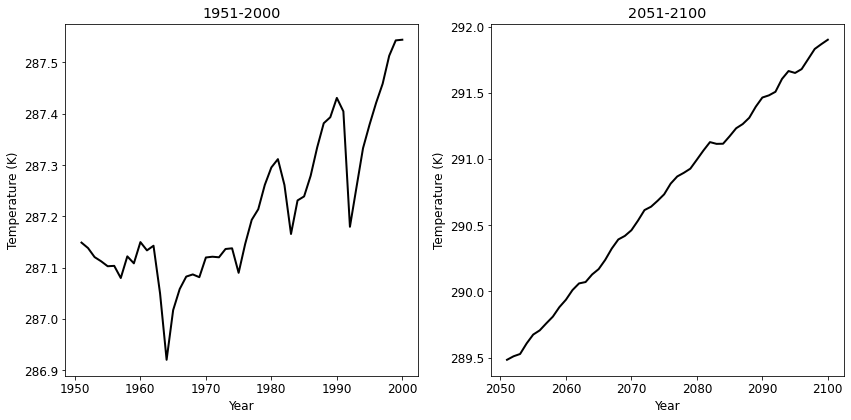

In [62]:
#  Plot the two time series
plt.figure(figsize=(12,6))

# plot first time series
plt.subplot(1,2,1)
plt.plot(year1,np.mean(TS_19512000,axis=0),'k',linewidth=2)
#plt.ylim(286.5,292)
plt.ylabel("Temperature (K)")
plt.xlabel("Year")
plt.title("1951-2000")

# plot second time series
plt.subplot(1,2,2)
plt.plot(year2,np.mean(TS_20512100,axis=0),'k',linewidth=2)
#plt.ylim(286.5,292)
plt.ylabel("Temperature (K)")
plt.xlabel("Year")
plt.title("2051-2100")

plt.tight_layout()

**Reflection Question:**\
How does your interpretation of the plots change if you change the y-limits of each plot so that they are the same? Add `plt.ylim()` to your plot to see.


## **STEP 2:**

Now, we can compute the trends. Since we have 30 ensemble members, it is convenient to perform a loop.

In [45]:
# initialize the regression coefficient arrays
a1 = np.zeros((30,2))
a2 = np.zeros((30,2))

# loop over 30 ensemble members
for i in range(30):
    a1[i,:] = np.polyfit(year1, TS_19512000[i,:],1)
    a2[i,:] = np.polyfit(year2, TS_20512100[i,:],1)

These are our "samples" of trends - we will use these later.

## **STEP 3:**

Now, let's calculate the confidence intervals on the slope for just the 1st ensemble member for each 50-year time period. We will use the `st.lingress()` function so that we get the standard error of the slope as an output.

Let's do the 1951-2000 time period first.

In [52]:
# 1951-2000

# Specify a value for N and use the st.lingress() function to compute the standard error of the slope
N = 50

#use the alternate way to calculate the best fit parameters
slope, intercept, r_value, p_value, std_err = st.linregress(year1,TS_19512000[0,:])

#find t_crit for our 95% confidence intervals on our slope
t_crit = st.t.ppf(0.975,N-2)
confidence_interval = t_crit*std_err
print("The true value of the 1951-2000 slope is then", np.round(slope*10,3), "+/-", np.round(confidence_interval*10,3), "K/decade")

The true value of the 1951-2000 slope is then 0.088 +/- 0.026 K/decade


Now, let's do the same thing for the 2051-2100 time period.

In [53]:
# 2051-2100

# Specify a value for N and use the st.lingress() function to compute the standard error of the slope
N = 50

#use the alternate way to calculate the best fit parameters
slope, intercept, r_value, p_value, std_err = st.linregress(year2,TS_20512100[0,:])

#find t_crit for our 95% confidence intervals on our slope
t_crit = st.t.ppf(0.975,N-2)
confidence_interval = t_crit*std_err
print("The true value of the 2051-2100 slope is then", np.round(slope*10,3), "+/-", np.round(confidence_interval*10,3), "K/decade")

The true value of the 2051-2100 slope is then 0.533 +/- 0.02 K/decade


**Reflection Question:**\
How do the slopes and the confidence intervals for these two time periods compare? For both time periods, are the trends significantly different from zero?

## II. Hypothesis Testing

In the previous section, we tested the significance of a single trend my calculating the confidence intervals on the slope. 

Alternatively, because we have "samples" of trends (we have 30 trends, one for each ensemble member), we can use a $t$-test to examine whether the trends are significantly different from zero. 

We will use the samples of trends we calculated above, `a1` and `a2` and we will use the 1-sample $t$-test function, `st.ttest_1samp` to test whether the sample of trends is significant under a null hypothesis that the trend is zero.

In [54]:
# calculate t-statistic for 1951-2000 time period. 
t1 = st.ttest_1samp(a1[:,0],0)
print(t1)

Ttest_1sampResult(statistic=26.44187621287299, pvalue=7.544228234003892e-22)


Wow! the p-value is extremely low. This suggests that the sample mean trend is significant different from zero.

In [56]:
# calculate t-statistic for 2051-2100 time period. 
t2 = st.ttest_1samp(a2[:,0],0)
print(t2)

Ttest_1sampResult(statistic=157.67533797244775, pvalue=4.2610347093614194e-44)


We get an even lower p-value for the 2051-2100 time period.